<a href="https://colab.research.google.com/github/dikshithakalva/Semantic_Segmentation_IDD/blob/main/Semantic_Segmentation__IDD_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **The authors of India Driving Dataset (IDD)**:
#### A Dataset for Exploring Problems of Autonomous Navigation in Unconstrained Environments highlight a notable gap in existing datasets, which primarily focus on structured driving environments with well-defined infrastructure, limited traffic categories, and adherence to traffic rules. To fill this void, the authors present IDD, a novel dataset tailored for road scene understanding in unstructured environments, specifically on Indian roads. The updated version of the dataset comprises 20k images, meticulously annotated with 41 classes, derived from 182 drive sequence.

#### Imagine you can break down an image into tiny pieces, and for each piece, you tell a computer what it is. Semantic segmentation does exactly that with deep learning! It analyzes every single pixel in an image and assigns a label, like "pedestrian" or "traffic sign," allowing applications like medical imaging or autonomous vehicles to make sense of their surroundings.

### Importing Datasets and the modules

In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'road-images:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3002709%2F5166685%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T130211Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0bce6e068ceac48eb53816e5c86084bb9276ee0696e745cf7ce9af2f769ad1a8586fac442853f8ce92f4fa67687626f9ec6db73896304ef9105a20cbbff651f0b9a59ce1d222c667ebd4dba511e3bf490d16afd03f425fec96899272c5257f5ce90d986350f261e2de00a5a85ee0d7f39c91c24a2a80b11335b2690fa7996db190e0c6b388c615e9236b83c62bdaf2f3bb8ec7ce97c015d30d06ddcff12769ab4aadbb9e1f5dac65c645eda06ca8759dad37e5c229211459cbd24c5f16aaf22639411f8cab1ba870c63763713fc8c7cde21435f96c05906390ee653a6e81202ee7e09c6c848dbcbb8cad69f6877982bc791f519efcd9d33c3410e373568d27c7,rtk-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3004894%2F5170136%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T130211Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2e8e4ec4849986e7d6d9d50e01d4276e48daa88c3953ec393c3afe94e92e28445fcf0d64d0803df5d8ca47f4936f0f1825d1eb0cb910cbd6e208b1d7ba120de9f971b9f7dee1b65022dc5f886e6a6ba5e26ac54ea6328625f008872f248873435fbdac5d57c721c3350916e64c97cd545d57796a699f2a33ee8513c55871074b4958fde3dc3d110b695c74add7eefb56fb30812234af23f03668dac88ea23b2e7421524679c1b707365a155f11ed6b9e9e73906a1e695db55284d05f567240ff27b2269e96472d12e08e44ecd7b37b370134b0eaa893525f6197cfdb99eaaef4202f830f481533c06c3e6c4f466feac7c979bae0a0d9db12e688729b9dddb107,new-idd-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3038135%2F5221909%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T130211Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D74ff6b79faa4aaf5915f6b040c7f3fdddeee997e1fe0165628609bcfecf81d3a57060b3b49c176d081ed0bdc6c5388e0368490e8ab7da120bfc5803474a4b49d6d88aeecce3f37f58521d89cbafdc7a99eb0564985597b31a822a0a479dca6fb655e871ec05fbf75ab214a9b73b9f592ed19b0d643f88830d1df6a03f73c7777f16e3eae950f8a9f267298c72b750a233b6627119bb76a30ce4320e8c669338c69ba63af9f1b9f483189b252a6c3b8e66bbacff7dbf32f6c21c94a9caeefd7bf47795d927474e5aff99a986dbca7d8cd346489e046f7b946b90284813d099edd81f6a5d5d073ee26b36c35c545ac44f4978ffed1c028ebe4819f069b42f0aca7,new-mapillary-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3097568%2F5333204%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240509%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240509T130211Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da29b42e232675642def549f85ccb2226cb6ac98e7a17c9b75d5aec434515ecac4b91d8a258827a66133d4e161149cc3754dfdef76e5bae7f999af44e0f578b99ce83e6705e7da160efae1ade9dc73e1f107df046eaef2f7669a791b7cd54e49cc38643b537dbdb12e1b4bea99a292af852da59294ab94f092cc8ae481ed65eb9beed13c77d3de5a1843db5e850ac656ef6a4edc44509ef1f04f70cdc9cd5263253aa5a3cc17b91bfe9722259138f0dee5c9648276c504b3c022ba727480322449f495a2fb941167662c3d475d7a26a9d2a5a01afe1ad0d6f8e8ff6e2d74a61e8884ff7ea9f97b957731f6dd4d392bea5d6ee608bcb1e70963a7c9e964a5f2b93'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 22510006 bytes downloaded
Downloaded and uncompressed: road-images
[==================================================] 101561967 bytes downloaded
Downloaded and uncompressed: rtk-dataset
[==================================================] 2995503490 bytes downloaded
Downloaded and uncompressed: new-idd-dataset
[==================================================] 2093216990 bytes downloaded
Downloaded and uncompressed: new-mapillary-dataset
Data source import complete.


In [ ]:
import json
import math
from PIL import Image, ImageDraw
from PIL import ImagePath
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
import cv2
import tensorflow as tf

### The Image and Mask Directory

In [ ]:
IMG_DIR = "/kaggle/input/new-idd-dataset/IDD_RESIZED/image_archive/"
MASK_DIR = "/kaggle/input/new-idd-dataset/IDD_RESIZED/mask_archive/"

imagedir = os.listdir(IMG_DIR)
maskdir = os.listdir(MASK_DIR)

imagedir.sort()
maskdir.sort()

In [ ]:
IMG_DIR_2 = "/kaggle/input/new-mapillary-dataset/MAPILLARY_DATASET/MAPILLARY_IMAGES/"
MASK_DIR_2 = "/kaggle/input/new-mapillary-dataset/MAPILLARY_DATASET/MAPILLARY_MASKS/"

imagedir2 = os.listdir(IMG_DIR_2)
maskdir2 = os.listdir(MASK_DIR_2)

imagedir2.sort()
maskdir2.sort()

In [ ]:
image_paths = []
for name in tqdm(imagedir):
    image_paths.append(IMG_DIR + name)

mask_paths = []
for name in tqdm(maskdir):
    mask_paths.append(MASK_DIR + name)

100%|██████████| 6993/6993 [00:00<00:00, 916443.30it/s]


In [ ]:
image_paths2 = []
for name in tqdm(imagedir2):
    image_paths2.append(IMG_DIR_2 + name)

mask_paths2 = []
for name in tqdm(maskdir2):
    mask_paths2.append(MASK_DIR_2 + name)

100%|██████████| 5000/5000 [00:00<00:00, 1240331.20it/s]


In [ ]:
total_image_paths = image_paths + image_paths2
total_mask_paths = mask_paths + mask_paths2
len(total_image_paths), len(total_mask_paths)

(11993, 11993)

In [ ]:
train_image_paths = total_image_paths[:int(len(total_image_paths)*0.8)]
train_mask_paths = total_mask_paths[:int(len(total_mask_paths)*0.8)]

val_image_paths = total_image_paths[int(len(total_image_paths)*0.8):]
val_mask_paths = total_mask_paths[int(len(total_mask_paths)*0.8):]

In [ ]:
def random_flip(image, mask):
    image = tf.image.flip_left_right(image)
    mask = tf.image.flip_left_right(mask)
    return image, mask

def random_brightness(image, mask):
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, mask

def random_hue(image, mask):
    image = tf.image.random_hue(image, max_delta=0.05)
    return image, mask

def load_image_and_mask(image_path, mask_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)

    mask = tf.io.read_file(mask_path)
    mask = tf.image.decode_png(mask, channels=1)

    image = tf.image.resize(image, (256, 256))
    mask = tf.image.resize(mask, (256, 256))

    image = tf.cast(image, tf.float32) / 255.0
    mask = tf.cast(mask, tf.float32)

    return image, mask

### Training and Validation

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_mask_paths))
val_dataset = tf.data.Dataset.from_tensor_slices((val_image_paths, val_mask_paths))

train_dataset = train_dataset.map(load_image_and_mask)
val_dataset = val_dataset.map(load_image_and_mask)

augmented_dataset1 = train_dataset.map(random_flip)
train_dataset = train_dataset.concatenate(augmented_dataset1)

batch_size = 16
buffer_size = 1000

# Shuffle and batch the dataset
train_dataset = train_dataset.shuffle(buffer_size)
train_dataset = train_dataset.batch(batch_size)
val_dataset = val_dataset.batch(batch_size)

# Prefetch the dataset to improve performance
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
train_dataset, val_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None))>)

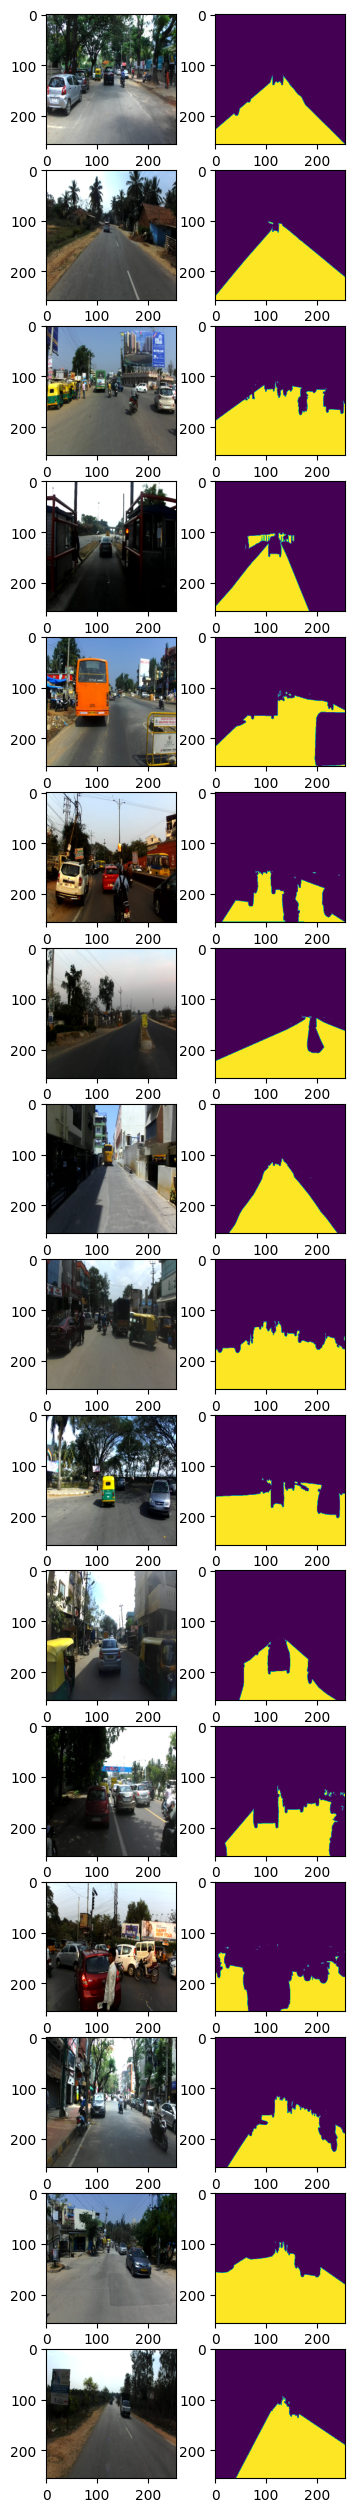

In [ ]:
images, masks = next(iter(train_dataset))
fig, ax = plt.subplots(16,2, figsize = (4, 32))
for i in range(16):
    ax[i][0].imshow(images[i])
    ax[i][1].imshow(masks[i])

### Conv2D then ReLU activation

In [ ]:
import tensorflow as tf
def double_conv_block(x, n_filters):
   # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
   # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(n_filters, 3, padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    return x

def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    p = tf.keras.layers.MaxPool2D(2)(f)
    p = tf.keras.layers.Dropout(0.3)(p)
    return f, p

def upsample_block(x, conv_features, n_filters):
   # upsample
    x = tf.keras.layers.Conv2DTranspose(n_filters, 3, 2, padding="same")(x)
   # concatenate
    x = tf.keras.layers.concatenate([x, conv_features])
   # dropout
    x = tf.keras.layers.Dropout(0.3)(x)
   # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)
    return x

def build_unet_model():
 # inputs
    inputs = tf.keras.layers.Input(shape=(256, 256, 3))
   # encoder: contracting path - downsample
   # 1 - downsample
    f1, p1 = downsample_block(inputs, 64)
   # 2 - downsample
    f2, p2 = downsample_block(p1, 128)
   # 3 - downsample
    f3, p3 = downsample_block(p2, 256)
   # 4 - downsample
    f4, p4 = downsample_block(p3, 512)
   # 5 - bottleneck
    bottleneck = double_conv_block(p4, 1024)
   # decoder: expanding path - upsample
   # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 512)
   # 7 - upsample
    u7 = upsample_block(u6, f3, 256)
   # 8 - upsample
    u8 = upsample_block(u7, f2, 128)
   # 9 - upsample
    u9 = upsample_block(u8, f1, 64)
   # outputs
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)
   # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
    return unet_model


### Accuracy

In [ ]:
unet_model = build_unet_model()
unet_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="binary_crossentropy",
                  metrics="accuracy")

### 10 Epochs

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/idd_mapillary.h5', verbose=1, save_best_only=True)

results = unet_model.fit(train_dataset,
                         validation_data = val_dataset,
                         validation_freq =1,
                         epochs=5,
                         callbacks=checkpointer
                        )

Epoch 1/5
1200/1200 [==============================] - ETA: 0s - loss: 0.6151 - accuracy: 0.8983
Epoch 1: val_loss improved from inf to 0.21986, saving model to /kaggle/working/idd_mapillary.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1200/1200 [==============================] - 1320s 1s/step - loss: 0.6151 - accuracy: 0.8983 - val_loss: 0.2199 - val_accuracy: 0.8926
Epoch 2/5
1200/1200 [==============================] - ETA: 0s - loss: 0.1476 - accuracy: 0.9353
Epoch 2: val_loss improved from 0.21986 to 0.18380, saving model to /kaggle/working/idd_mapillary.h5
1200/1200 [==============================] - 1217s 1s/step - loss: 0.1476 - accuracy: 0.9353 - val_loss: 0.1838 - val_accuracy: 0.9155
Epoch 3/5
1200/1200 [==============================] - ETA: 0s - loss: 0.1345 - accuracy: 0.9410
Epoch 3: val_loss improved from 0.18380 to 0.16033, saving model to /kaggle/working/idd_mapillary.h5
1200/1200 [==============================] - 1219s 1s/step - loss: 0.1345 - accuracy: 0.9410 - val_loss: 0.1603 - val_accuracy: 0.9232
Epoch 4/5
1200/1200 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9461
Epoch 4: val_loss improved from 0.16033 to 0.15717, saving model to /kaggle/working/idd_mapillary.h5
1

In [ ]:
loaded_model = build_unet_model()
loaded_model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss="binary_crossentropy",
                  metrics="accuracy")
loaded_model.load_weights("/kaggle/working/idd_mapillary.h5")

In [ ]:
campus_dir = os.listdir("/kaggle/input/road-images/ROAD")
campus_images_names = [ names for names in campus_dir if names.endswith(".jpeg")]
images = []
preds = []
for i in range(0,len(campus_images_names)):
    image = tf.io.read_file("/kaggle/input/road-images/ROAD/" + campus_images_names[i])
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [256, 256])
    images.append(image)
    mask = loaded_model.predict(tf.expand_dims(image, axis=0))[0]
    preds.append(mask)

images = np.array(images)
preds = np.array(preds)

1/1 [==============================] - 0s 26ms/step


In [ ]:
pred2 = preds.copy()
for i in tqdm(range(0, len(pred2))):
    for j in range(0,len(pred2[i])):
        for k in range(0,len(pred2[i][j])):
            if pred2[i][j][k] > 0.8 :
                pred2[i][j][k] = 255
            else:
                pred2[i][j][k] = 0

100%|██████████| 31/31 [00:06<00:00,  4.45it/s]


### Prediction after Epochs

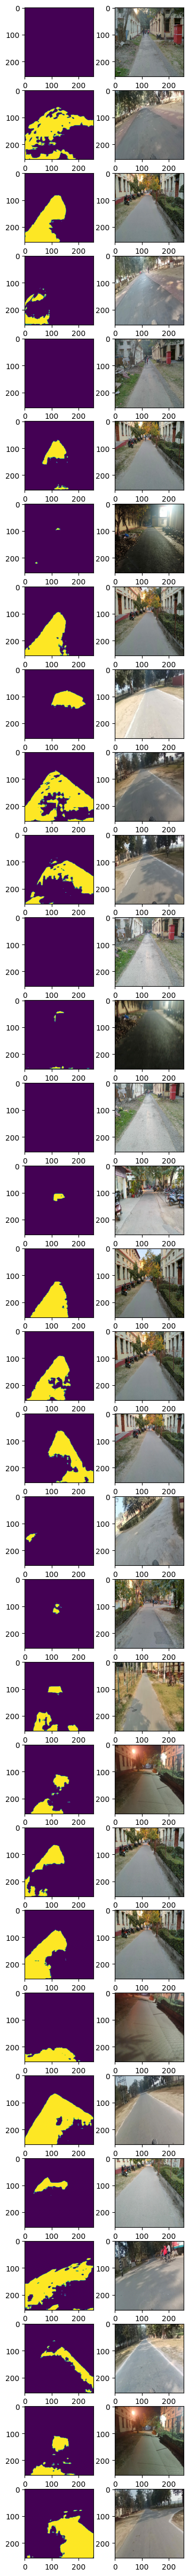

In [ ]:
fig, ax = plt.subplots(len(pred2),2,figsize = (4,(2*len(pred2))))
for i in range(0,len(pred2)):
    ax[i][1].imshow(images[i])
    ax[i][0].imshow(pred2[i])